In [2]:
include("RCWA_2D_new.jl")
include("fft_permittivity.jl")
include("K_calc.jl")
include("homogeneous_eigen.jl")
include("S_calc.jl")
include("P_Q_calc.jl")
include("layer_eigen.jl")
include("Redheffer_star.jl")
include("Pol_Cin_calc.jl")
include("Toeplitz_make.jl")

toeplitz (generic function with 1 method)

In [3]:
# running 2D_RCWA
θ = 40
ϕ = 0
Λx = 12
Λy = 12
d = [5 8 5]
Φ = 0;

  8.176558 seconds (25.62 M allocations: 2.578 GiB, 5.07% gc time, 88.57% compilation time: <1% of which was recompilation)


sys:1: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.


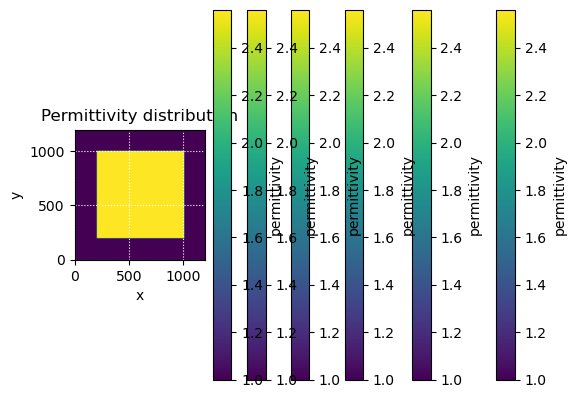

In [4]:
include("RCWA_2D_new.jl")
include("RCWA_2D.jl")
include("Toeplitz_make.jl")
include("Toeplitz_x_to_y.jl")

Nx = 1200
Ny = 1200
x_start = 200
y_start = 200
x_end = 1000
y_end = 1000
n = 1.6 ^2
angle = 0

pp = 120 # GHz

syu = (2.9979e+05 ./ ((1 .+ pp./ 1))) .* 10^-3

nu = 1 .+ pp./ 1

P = collect(1:3)

function RCWA2D_run(λ_1, θ, ϕ, Λx, Λy, d, Φ, P)
 
    Tl = zeros(length(P))

    Tp_0_0 = zeros(length(P))

    Tl_1 = zeros(length(P))

    Tp_0_0_1 = zeros(length(P))
    
    @inbounds for (i, P_1) in enumerate(P)

        E_2_1 = beta_n(Nx, Ny, x_start, x_end, y_start, y_end, n, angle, P_1);
        
        F_2 = Fourier_permittivity(Nx, Ny, x_start, x_end, y_start, y_end, n, angle);
        
        # making Toeplitz P=Q 
  
        Q = Int(P_1)
        
        N = Int(P_1)
        
        M = Q
        
        E_1_1 = 1.6^2 * Matrix(I, (2*P_1 + 1)*(2*Q + 1), (2*P_1 + 1)*(2*Q + 1));
        
        E_2 = toeplitz(F_2, P_1, Q);
        
        E_matrix_1 = []
        
        E_matrix = []
        
        push!(E_matrix, E_2)
        
        push!(E_matrix, E_1_1)
    
        push!(E_matrix, E_2);
    
        push!(E_matrix_1, E_2_1)
    
        push!(E_matrix_1, E_1_1)
    
        push!(E_matrix_1, E_2_1);
        
        R, Tl[i], Tp, Tp_0_0_matrix = RCWA2D_new(λ_1, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix, P_1, Q, Φ)

        Tp_0_0[i] = Tp_0_0_matrix[Int(((2*N+1)^2+1)/2)]

        R, Tl_1[i], Tp, Tp_0_0_matrix = RCWA2D_new(λ_1, θ, ϕ, Λx, Λy, d, E_matrix, E_matrix_1, P_1, Q, Φ)

        Tp_0_0_1[i] = Tp_0_0_matrix[Int(((2*N+1)^2+1)/2)]

    end

    return Tl, Tp_0_0, Tl_1, Tp_0_0_1

end

@time Tl, Tp_0_0, Tl_1, Tp_0_0_1 = RCWA2D_run(syu, θ, ϕ, Λx, Λy, d, Φ, P);

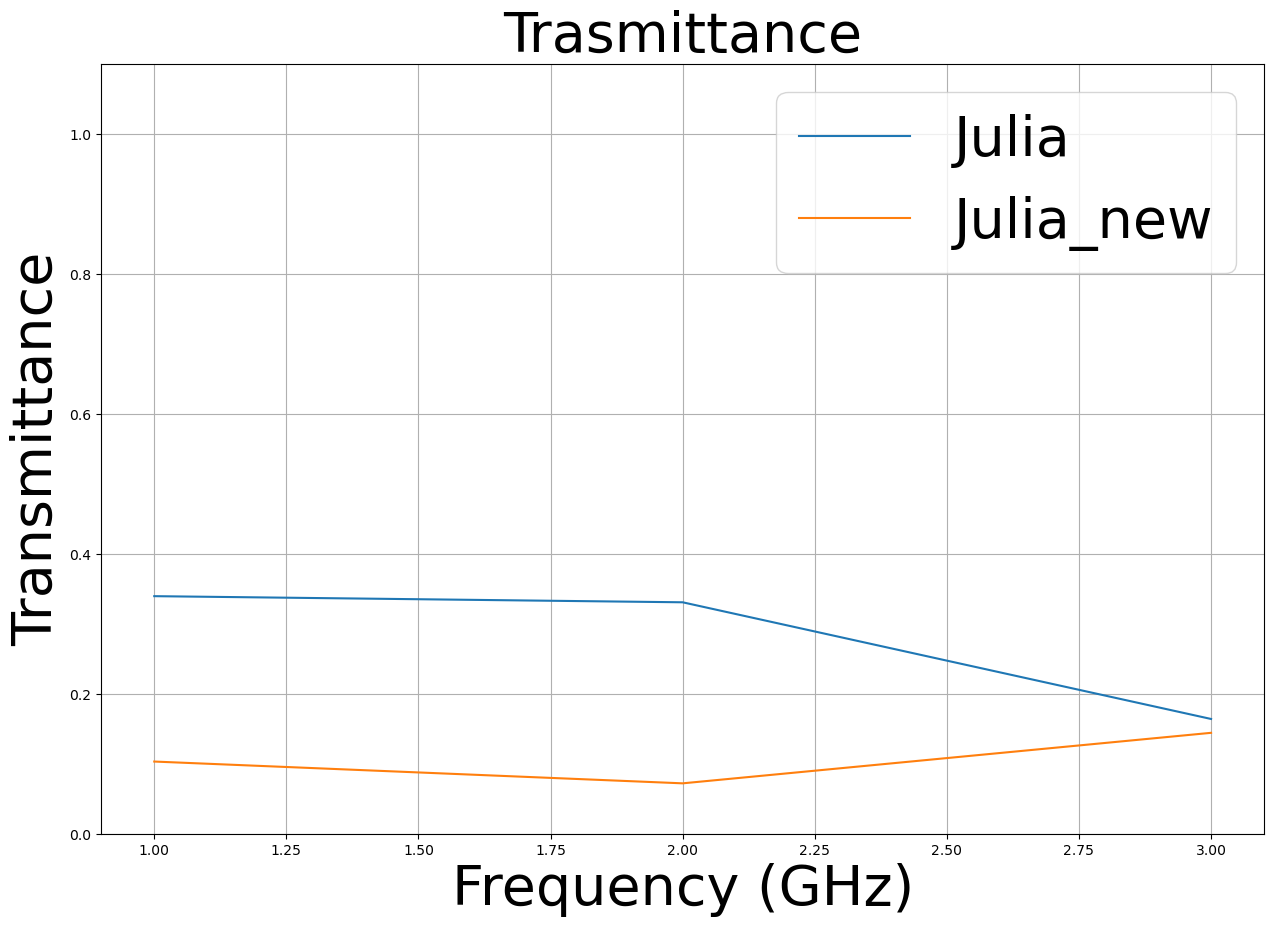

In [5]:
fig = PyPlot.figure()

fig.set_figheight(10)
fig.set_figwidth(15)

#PyPlot.plot(nu, Tl,label ="Julia")
#PyPlot.plot(nu, Tl_1,label ="Julia_new")

PyPlot.plot(P, Tp_0_0,label ="Julia")
PyPlot.plot(P, Tp_0_0_1,label ="Julia_new")

PyPlot.xlabel("Frequency (GHz)", fontsize=40)
PyPlot.ylabel("Transmittance", fontsize=40)
PyPlot.grid()
PyPlot.legend(fontsize=40)
PyPlot.title("Trasmittance", fontsize=40)
PyPlot.ylim(0,1.1)
#PyPlot.xlim(100, 140)
PyPlot.show()